In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 1. Data Overview
- Explore the basic characteristics of the dataset, including dimensions, datatypes, and missing values

In [3]:
zomato = pd.read_csv("Indian-Resturants.csv") 

In [4]:
zomato.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [5]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [6]:
zomato.shape

(211944, 26)

In [7]:
# Finding missing values

zomato.isnull().sum()/len(zomato)*100

res_id                   0.000000
name                     0.000000
establishment            0.000000
url                      0.000000
address                  0.063224
city                     0.000000
city_id                  0.000000
locality                 0.000000
latitude                 0.000000
longitude                0.000000
zipcode                 76.995338
country_id               0.000000
locality_verbose         0.000000
cuisines                 0.656305
timings                  1.827841
average_cost_for_two     0.000000
price_range              0.000000
currency                 0.000000
highlights               0.000000
aggregate_rating         0.000000
rating_text              0.000000
votes                    0.000000
photo_count              0.000000
opentable_support        0.022647
delivery                 0.000000
takeaway                 0.000000
dtype: float64

In [8]:
# As we can see the missing value percentage  is above 25% for zipcode column so we will drop this column.
zomato.drop("zipcode", axis = 1, inplace= True)

In [9]:
## Handling the object missing values
for k in zomato.select_dtypes(["object"]):
    zomato[k] = zomato[k].fillna(zomato[k].mode()[0])

In [10]:
## Handling the float missing values 
zomato["opentable_support"] = zomato["opentable_support"].fillna(zomato["opentable_support"].mean())

In [11]:
zomato.isnull().sum()/len(zomato)*100

res_id                  0.0
name                    0.0
establishment           0.0
url                     0.0
address                 0.0
city                    0.0
city_id                 0.0
locality                0.0
latitude                0.0
longitude               0.0
country_id              0.0
locality_verbose        0.0
cuisines                0.0
timings                 0.0
average_cost_for_two    0.0
price_range             0.0
currency                0.0
highlights              0.0
aggregate_rating        0.0
rating_text             0.0
votes                   0.0
photo_count             0.0
opentable_support       0.0
delivery                0.0
takeaway                0.0
dtype: float64

## - Finding Outliers

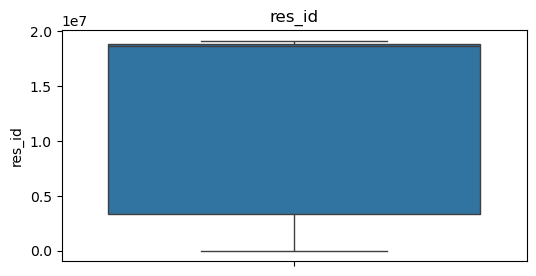

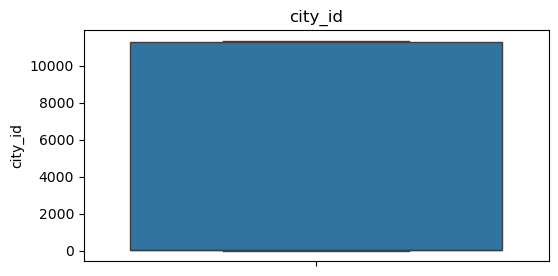

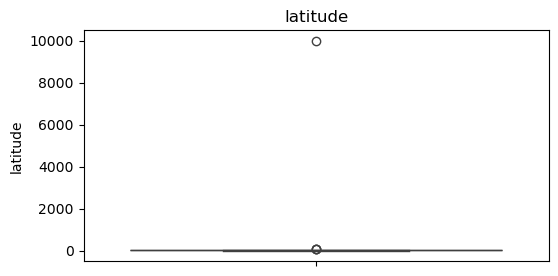

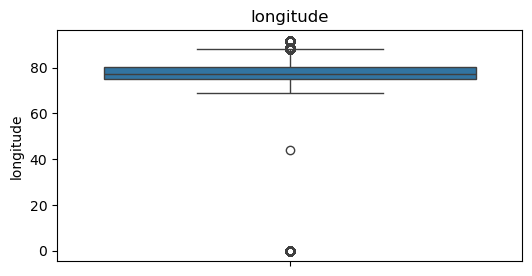

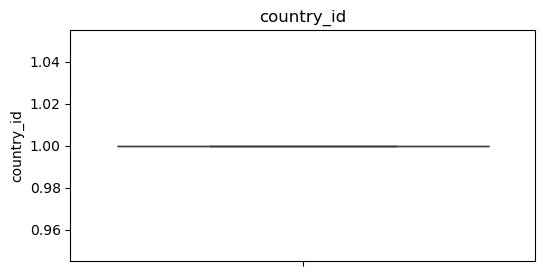

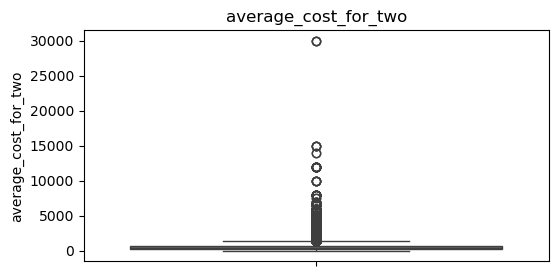

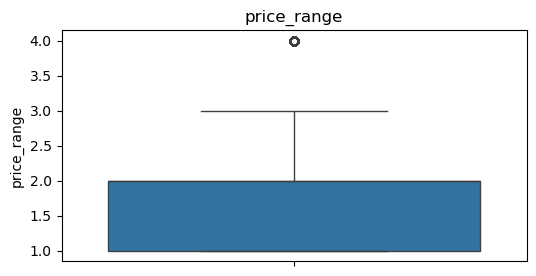

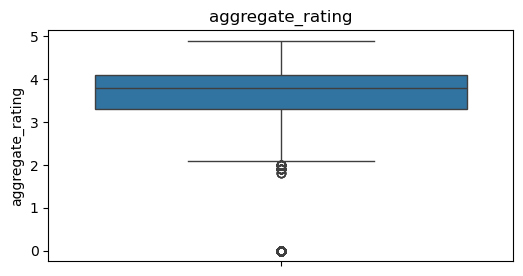

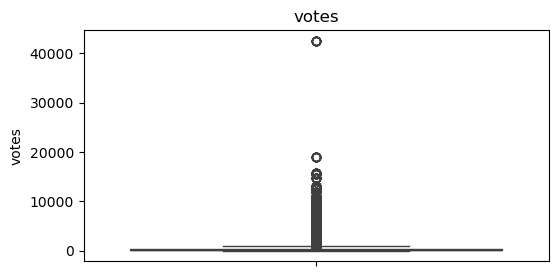

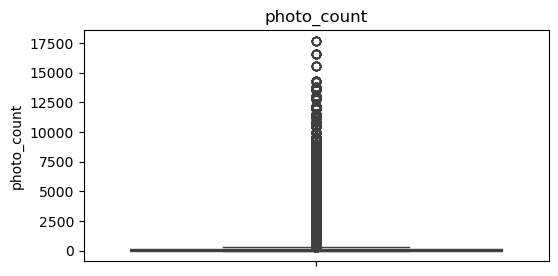

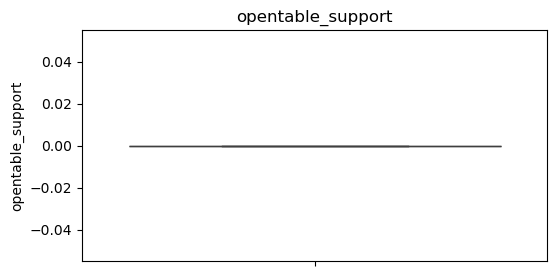

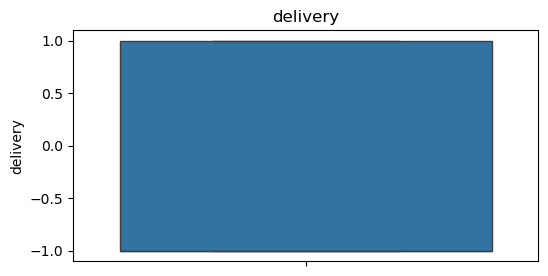

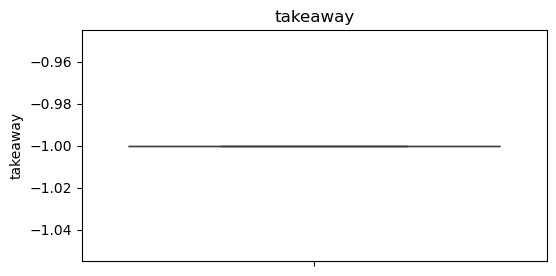

In [13]:
for i in zomato.select_dtypes(["int64","float64"]):
    plt.figure(figsize = (6,3))
    sns.boxplot(zomato[i])
    plt.title(i)
    plt.show()

## - Handling Outliers

In [15]:
## using Inter Quartile Method (IQR) method

outlier_list1 = [ "average_cost_for_two", "price_range","votes", "photo_count","aggregate_rating"]

for j in outlier_list1:
    q1 = zomato[j].quantile(0.25)
    q3 = zomato[j].quantile(0.75)
    iqr = q3 - q1

    print("IQR:", iqr)
    print()
    print("Q1:", q1)
    print()
    print("Q2:", q3)
    print()

    ul = q3 + 1.5 * iqr
    ll = q1 - 1.5 * iqr
    print(ul)
    print(ll)
    
    ## setting the outlier values
    zomato[j] = np.where(zomato[j]>ul,ul,
                        np.where(zomato[j]<ll,ll,
                                zomato[j]))
    
    

IQR: 450.0

Q1: 250.0

Q2: 700.0

1375.0
-425.0
IQR: 1.0

Q1: 1.0

Q2: 2.0

3.5
-0.5
IQR: 346.0

Q1: 16.0

Q2: 362.0

881.0
-503.0
IQR: 125.0

Q1: 3.0

Q2: 128.0

315.5
-184.5
IQR: 0.7999999999999998

Q1: 3.3

Q2: 4.1

5.299999999999999
2.1


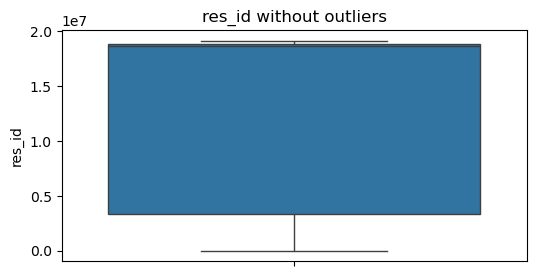

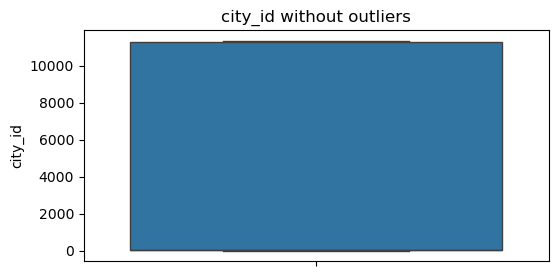

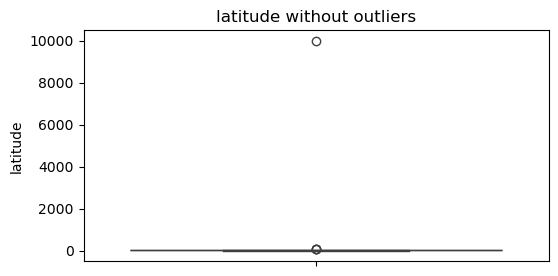

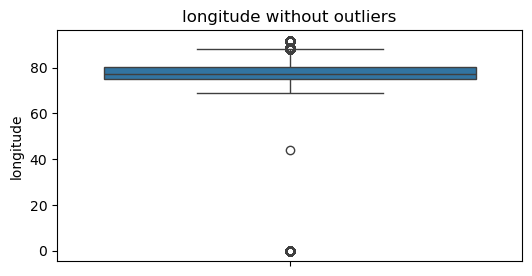

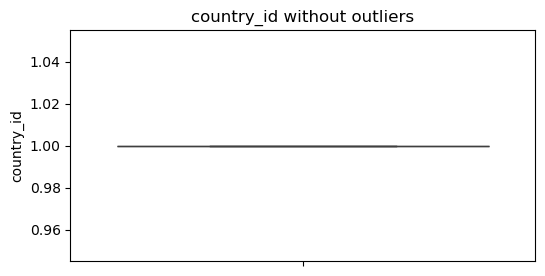

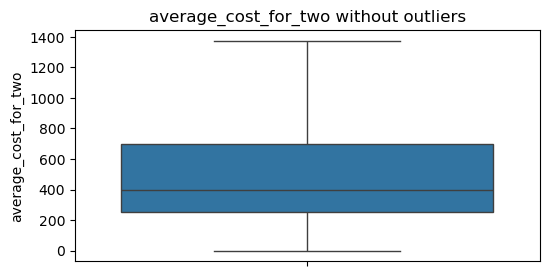

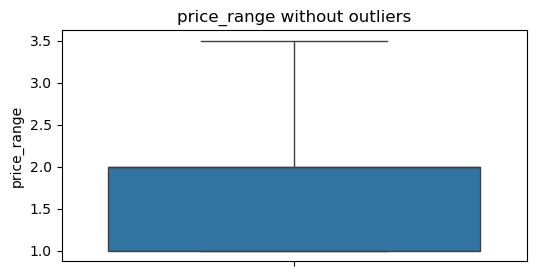

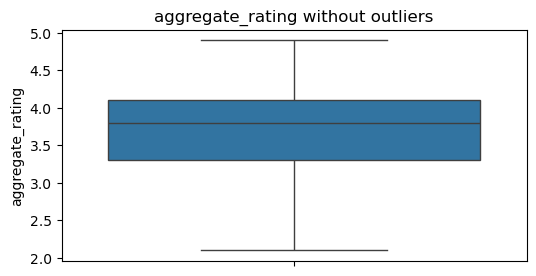

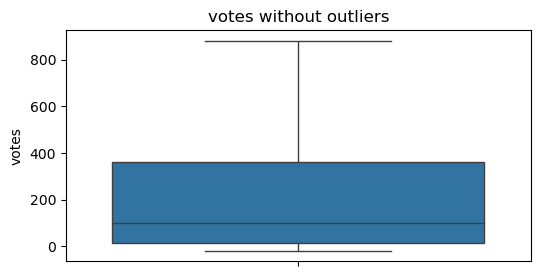

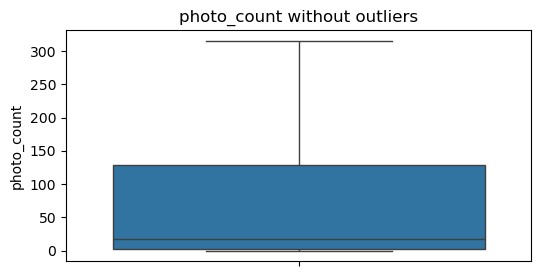

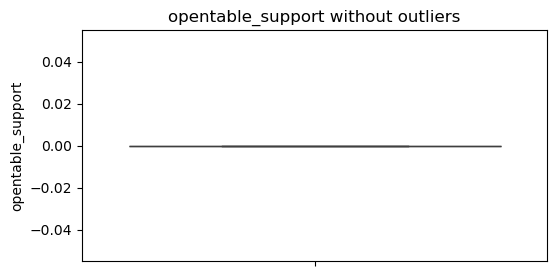

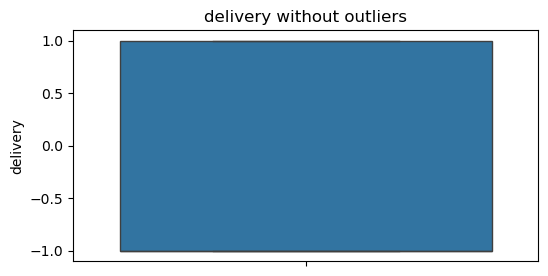

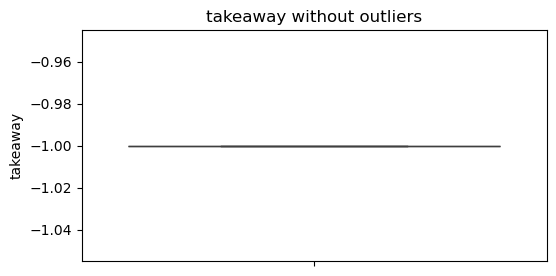

In [16]:
for i in zomato.select_dtypes(["int64","float64"]):
    plt.figure(figsize = (6,3))
    sns.boxplot(zomato[i])
    plt.title(f"{i} without outliers")
    plt.show()

## 2.Basic Statistics
-  Calculate and visualize the average rating of restaurants.
- Analyze the distribution of restaurant ratings to understand the overall rating
 landscape

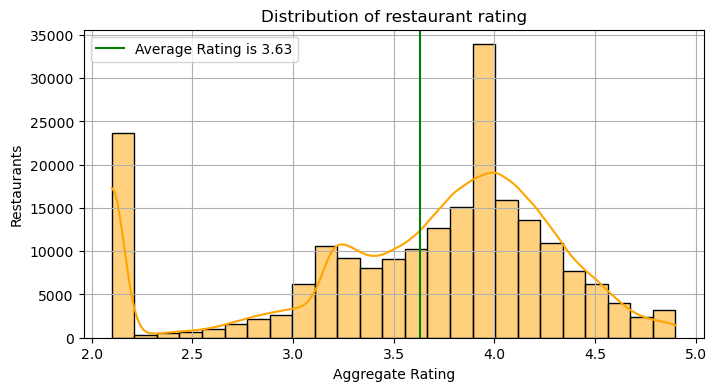

In [18]:
## Calculating the average rating of restaurants
average_rating = zomato["aggregate_rating"].mean()

## Showing the distribution of rating through the restaurants
plt.figure(figsize = (8,4))
plt.title("Distribution of restaurant rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Restaurants")
sns.histplot(zomato, x = "aggregate_rating", bins = 25, kde = True, color = "orange")
plt.axvline(average_rating, color='Green', label = f"Average Rating is {average_rating:.2f}")
plt.grid(visible = True)
plt.legend()
plt.show()


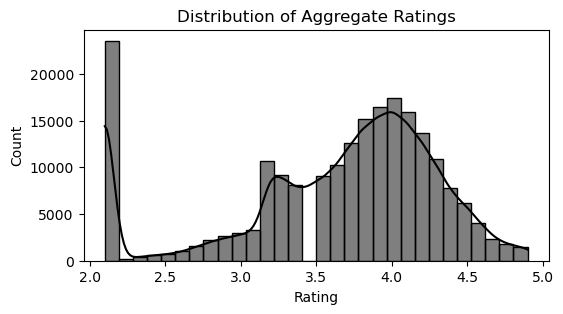

In [19]:
## Analyze the distribution of restaurant ratings to understand the overall rating landscape
plt.figure(figsize = (6,3))
sns.histplot(zomato['aggregate_rating'], bins=30,  kde=True, color = "black")
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

##  3.Location Analysis:
- Identify the city with the highest concentration of restaurants.
- Visualize the distribution of restaurant ratings across different cities.

In [21]:
city_count = zomato["city"].value_counts()
city_count
city_count_df = pd.DataFrame(city_count)
city_count_df

,count
city,
Chennai,11630
Mumbai,6497
Bangalore,4971
Pune,4217
Lucknow,4121
...,...
Ghaziabad,132
Faridabad,124
Howrah,66


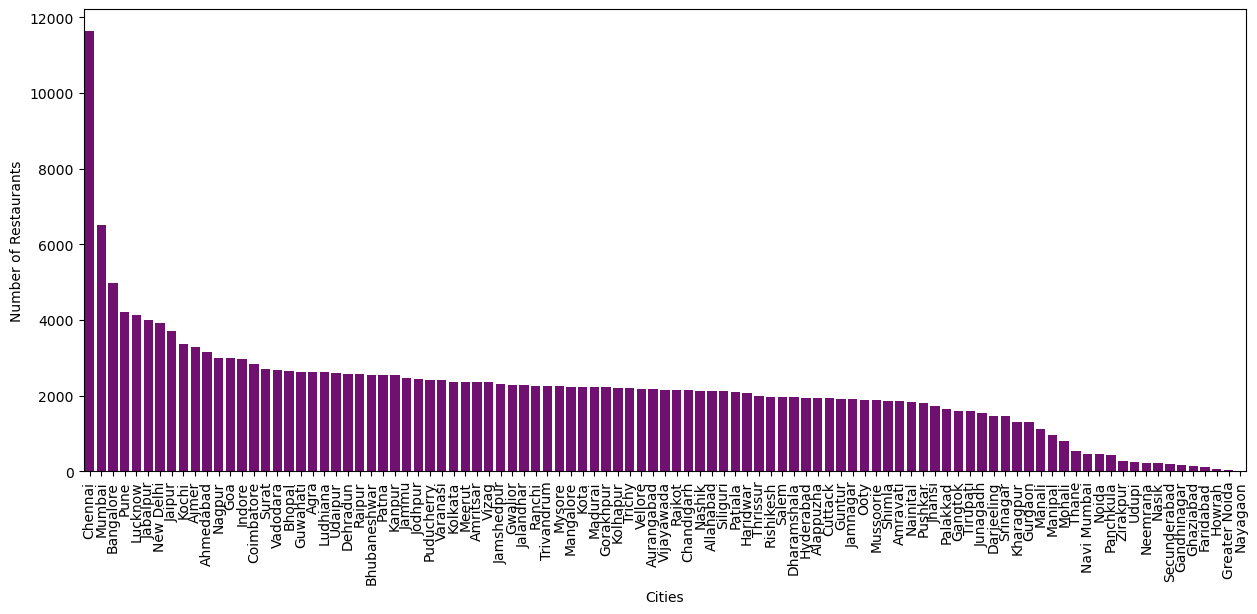

In [22]:
plt.figure(figsize = (15,6))

## convert series to dataframe
city_count = zomato["city"].value_counts().reset_index()
city_count.columns = ["city", "restaurant_count"]


## visualization of restaurant count
sns.barplot(data = city_count, x = "city", y = "restaurant_count", color = "purple")
plt.xticks(rotation = 90)
plt.xlabel("Cities")
plt.ylabel("Number of Restaurants")
plt.show()


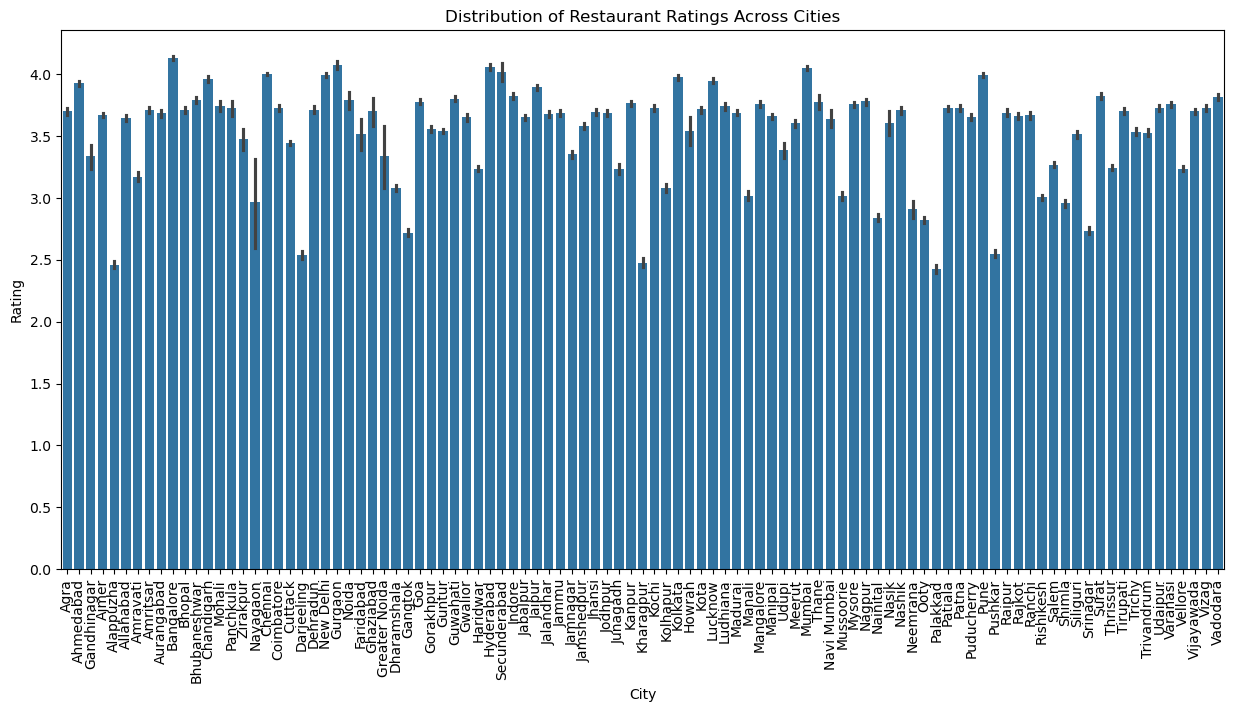

In [23]:
# Visualization of distribution of restaurant across cities

plt.figure(figsize=(15, 7))
sns.barplot(x='city', y='aggregate_rating', data=zomato)
plt.xticks(rotation=90)
plt.title('Distribution of Restaurant Ratings Across Cities')
plt.xlabel('City')
plt.ylabel('Rating')
plt.show()


## 4. Cuisine Analysis

In [25]:
## The most popular cuisines among the listed restaurants
popular_cuisines = zomato["cuisines"].value_counts()
popular_cuisines

popular_cuisines_df = pd.DataFrame(popular_cuisines)
popular_cuisines_df

,count
cuisines,
North Indian,17387
Fast Food,6721
Cafe,6190
"North Indian, Chinese",5820
South Indian,5217
...,...
"North Indian, Chinese, Continental, Healthy Food",1
"Mughlai, North Indian, Chinese, Continental, Italian",1
"Burger, Rolls, Fast Food",1


In [26]:
# Now create a new column: number of cuisines offered
zomato['num_cuisines'] = zomato['cuisines'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)
print(zomato[['cuisines', 'num_cuisines', 'aggregate_rating']].head())

correlation = zomato['num_cuisines'].corr(zomato['aggregate_rating'])
print(f"Correlation between variety of cuisines and rating: {correlation:.3f}")


                                            cuisines  num_cuisines  \
0  North Indian, South Indian, Mithai, Street Foo...             5   
1  North Indian, Mughlai, Rolls, Chinese, Fast Fo...             6   
2                                  Fast Food, Mithai             2   
3          Desserts, Bakery, Fast Food, South Indian             4   
4                 North Indian, Continental, Italian             3   

   aggregate_rating  
0               4.4  
1               4.4  
2               4.2  
3               4.3  
4               4.9  
Correlation between variety of cuisines and rating: 0.270


## 5. Price Range and Rating
-  Analyze the relationship between price range and restaurant ratings.
- Visualize the average cost for two people in different price categories

In [28]:
## Analyzing the relationship between price range and restaurant ratings.
grouped_series = zomato.groupby("price_range")["aggregate_rating"].mean().reset_index()
grouped_series
grouped_df = pd.DataFrame(grouped_series)
grouped_df

,price_range,aggregate_rating
0,1.0,3.405808
1,2.0,3.663985
2,3.0,3.950096
3,3.5,4.015623


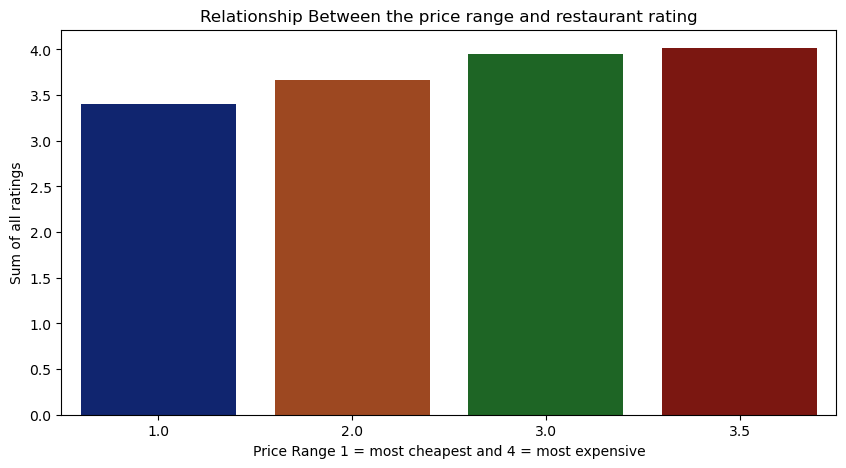

In [29]:
plt.figure(figsize = (10,5))
sns.barplot(data= grouped_df, x="price_range",y="aggregate_rating", palette='dark')
plt.xlabel("Price Range 1 = most cheapest and 4 = most expensive")
plt.ylabel("Sum of all ratings")
plt.title("Relationship Between the price range and restaurant rating")
plt.show()


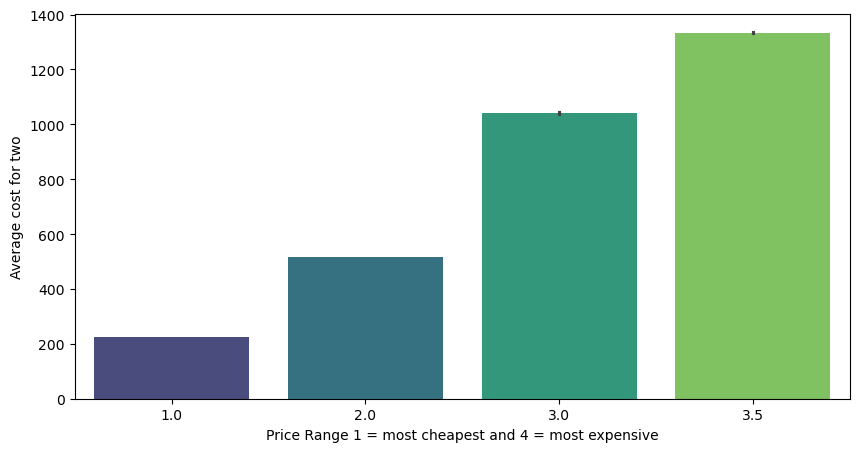

In [30]:
## Visualizing the average cost for two people in different price categories

plt.figure(figsize = (10,5))
sns.barplot(data = zomato, x = "price_range", y = "average_cost_for_two",palette='viridis')
plt.xlabel("Price Range 1 = most cheapest and 4 = most expensive")
plt.ylabel("Average cost for two")
plt.show()

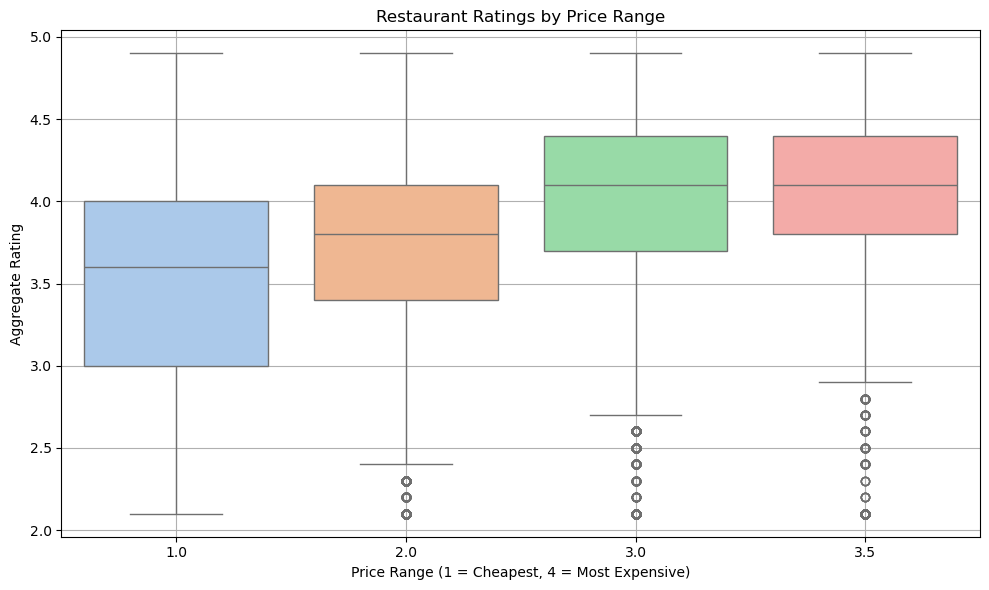

In [31]:
price_rating_summary = zomato[['price_range', 'aggregate_rating']].dropna()

# Boxplot to visualize the distribution of ratings across price ranges
plt.figure(figsize=(10, 6))
sns.boxplot(data=price_rating_summary, x='price_range', y='aggregate_rating', palette = "pastel")
plt.title('Restaurant Ratings by Price Range')
plt.xlabel('Price Range (1 = Cheapest, 4 = Most Expensive)')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.tight_layout()
plt.show()


## 6. Online Order and Table Booking

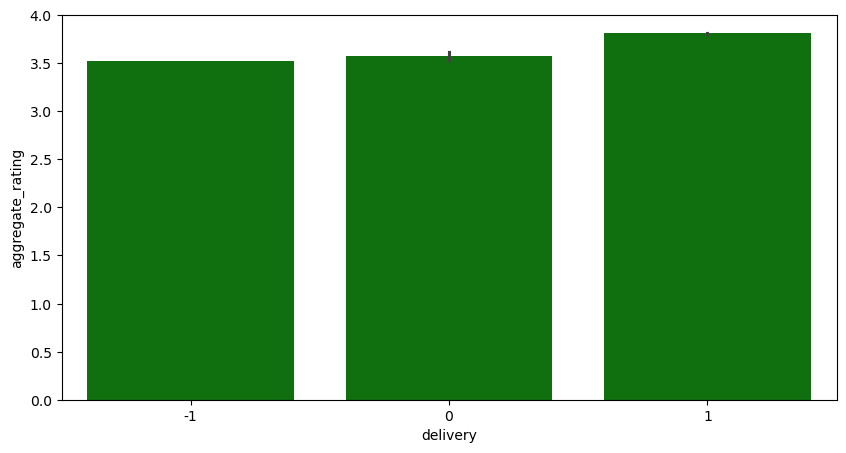

In [33]:
plt.figure(figsize = (10,5))
sns.barplot(zomato, x = "delivery", y = "aggregate_rating", color = "green")
plt.show()

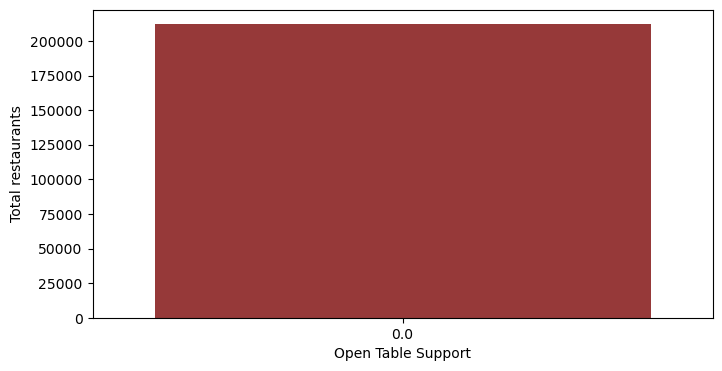

In [34]:
## Analyzing the distribution of restaurants that offer table booking

plt.figure(figsize = (8,4))
sns.countplot(data = zomato, x = "opentable_support", color = "brown")
plt.xlabel("Open Table Support")
plt.ylabel("Total restaurants")
plt.show()

## 7. Top Restaurant Chains

In [36]:
## Identify and visualize the top restaurant chains based on the number of outlets

chain_count = zomato["name"].value_counts().head(50)

chain_count_df = pd.DataFrame(chain_count)
chain_count_df

,count
name,
Domino's Pizza,3108
KFC,1343
Cafe Coffee Day,1068
Pizza Hut,936
Subway,766
Barbeque Nation,725
Burger King,658
McDonald's,578
Keventers,512


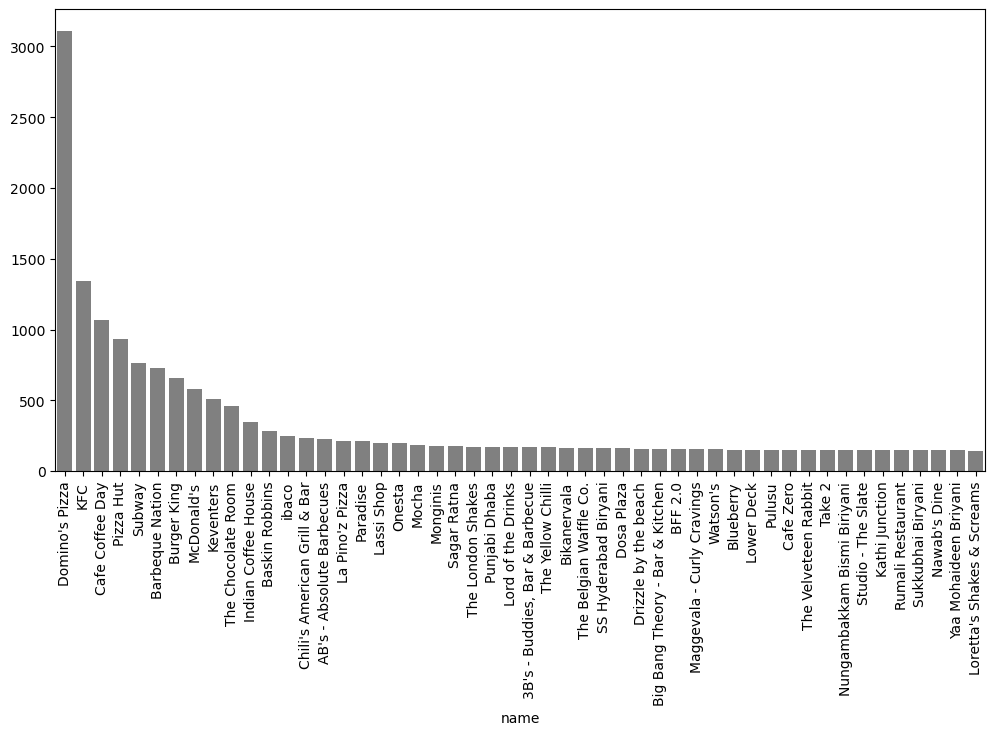

In [37]:
## visualization for chain count

plt.figure(figsize = (12,6))
sns.barplot(x = chain_count_df.index, y = chain_count.values , color = "grey")
plt.xticks(rotation = 90)
plt.show()

In [38]:
## Explore the ratings of these top chains.
chain_analysis = zomato.groupby("name").agg(
    number_outlets = ("name", "count"),
    avg_rating = ("aggregate_rating", "mean")).sort_values(by = "number_outlets", ascending = False)

In [39]:
chain_analysis.head(10)

,number_outlets,avg_rating
name,,
Domino's Pizza,3108,3.750000
KFC,1343,3.945197
Cafe Coffee Day,1068,3.152715
Pizza Hut,936,3.726389
Subway,766,3.789556
Barbeque Nation,725,4.510621
Burger King,658,3.964438
McDonald's,578,3.937889
Keventers,512,3.846484


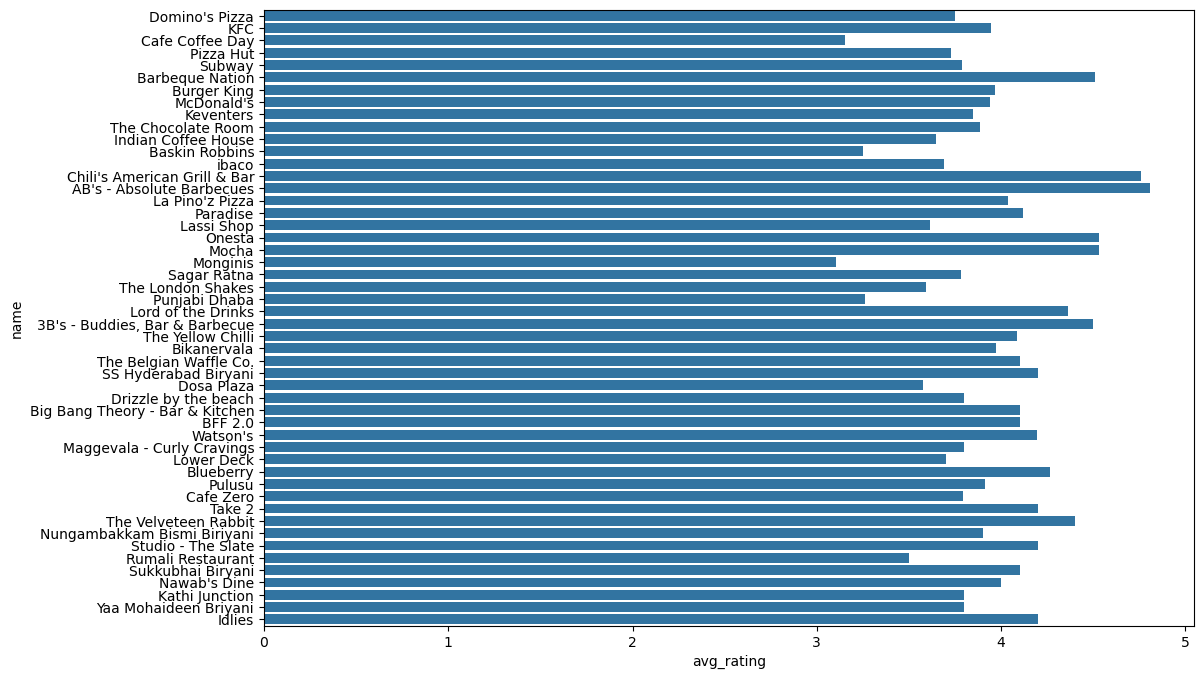

In [40]:
plt.figure(figsize = (12,8))
sns.barplot(chain_analysis.head(50), x = "avg_rating", y = "name")

plt.show()

## 8. Restaurant Features

In [42]:
zomato["highlights"].head(10)

0    ['Lunch', 'Takeaway Available', 'Credit Card',...
1    ['Delivery', 'No Alcohol Available', 'Dinner',...
2    ['No Alcohol Available', 'Dinner', 'Takeaway A...
3    ['Takeaway Available', 'Credit Card', 'Lunch',...
4    ['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...
5    ['Credit Card', 'Lunch', 'Delivery', 'Dinner',...
6    ['Dinner', 'Delivery', 'Lunch', 'Cash', 'Takea...
7    ['Lunch', 'Delivery', 'Credit Card', 'No Alcoh...
8    ['Takeaway Available', 'Cash', 'Indoor Seating...
9    ['No Alcohol Available', 'Dinner', 'Delivery',...
Name: highlights, dtype: object

In [43]:
import ast


zomato["highlights"] = zomato["highlights"].apply(ast.literal_eval)

## seaparte unique features for each list
all_feat = set([j for i in zomato["highlights"] for j in i])

## One hot encoding 
for i in all_feat:
    zomato[i] = zomato["highlights"].apply(lambda x: 1 if i in x else 0)

In [44]:
zomato.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude',
       ...
       'Keto Options', 'Digital Payments Accepted', 'Bulk Orders Accepted',
       'Bira 91 Beer', 'Restricted Entry', 'Gluten Free Options', 'Paid Wifi',
       'Wheelchair Accessible', 'Private Dining Area Available',
       'Indoor Seating'],
      dtype='object', length=129)

In [45]:
zomato["WiFi"].value_counts()

Wifi
0    192868
1     19076
Name: count, dtype: int64

In [46]:
## if restaurats have wifi
def plot(df, x):
    data = df.groupby(x)["aggregate_rating"].mean()
    sns.barplot(data)
    plt.title(f"{x} vs aggregate_rating")
    plt.show()

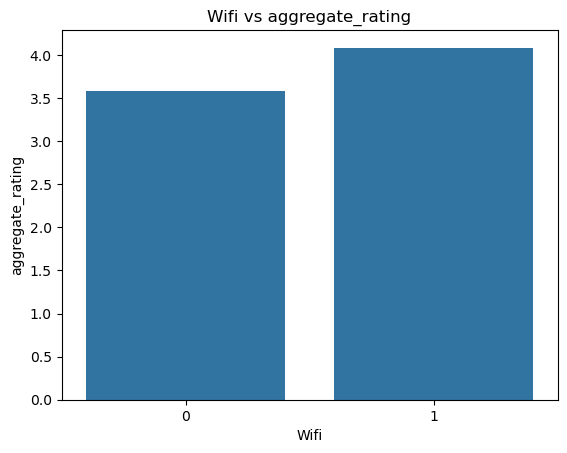

In [47]:
plot(df=zomato, x="WiFi")

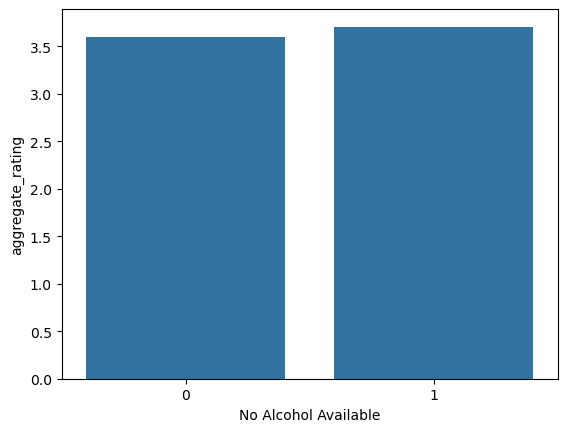

In [48]:
## No Alcohol Available	
no_alco_rating = zomato.groupby("No Alcohol Available")["aggregate_rating"].mean()
sns.barplot(no_alco_rating)
plt.show()

## 9.Word Cloud for Reviews

In [50]:
!pip install wordcloud

In [51]:
from wordcloud import WordCloud

In [52]:
text_rating = zomato.groupby("name")["rating_text"]
text_rating

In [53]:
text_rating_df = zomato.groupby("name")["rating_text"]
text_rating_df

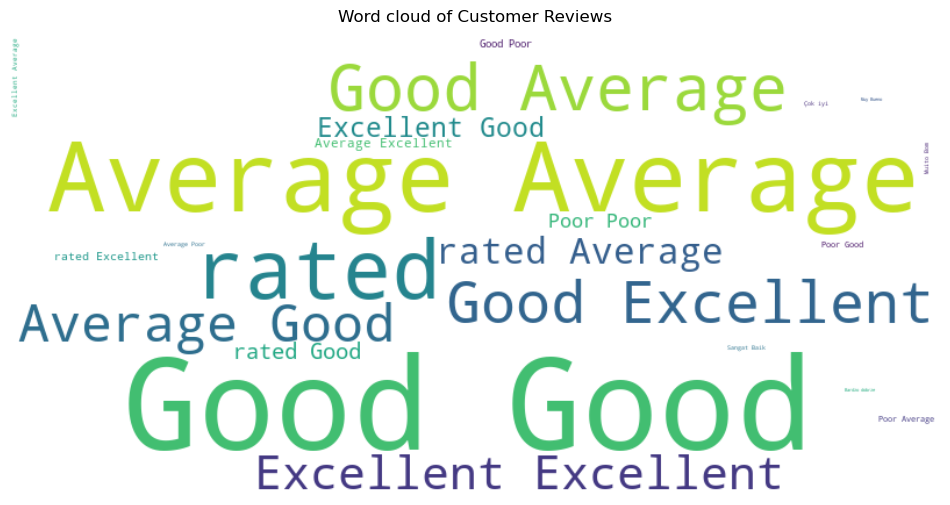

In [54]:
if "rating_text" in zomato.columns:
    review_txt = ' '.join(zomato["rating_text"].dropna().tolist())
    wordcloud = WordCloud(width = 800, height = 400, background_color = "white").generate(review_txt)
    plt.figure(figsize = (12,8))
    plt.imshow(wordcloud, interpolation =  "bilinear")
    plt.axis("off")
    plt.title("Word cloud of Customer Reviews")
    plt.show()